In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

trainDataset = "_data/train_essays.csv"
testDataset = "_data/test_essays.csv"
promtDataset = "_data/train_prompts.csv"

trainDf = pd.read_csv(trainDataset)
testDf = pd.read_csv(testDataset)
promptDf = pd.read_csv(promtDataset)

In [2]:
print("--------trainDf-------")
print(trainDf.info())
print("\n")

print("--------testDf-------")
print(testDf.info())
print("\n")

print("--------promptDf-------")
print(promptDf.info())

--------trainDf-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None


--------testDf-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
None


--------promptDf-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        -------------- 

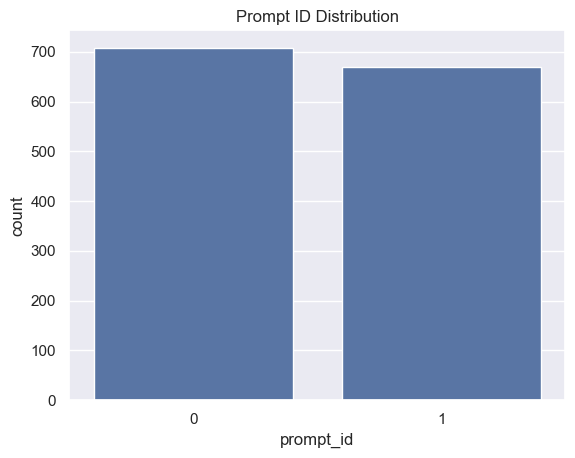

In [3]:
# prompt id distribution
sns.set(style="darkgrid")
sns.countplot(x='prompt_id', data=trainDf)
plt.title('Prompt ID Distribution')
plt.show()

Human: 1375
AI: 3


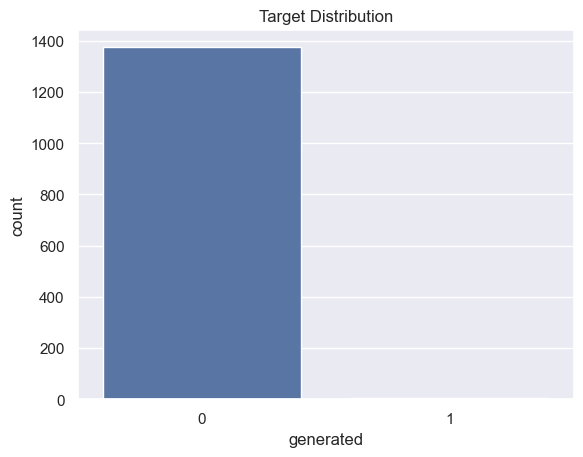

In [4]:
# target distribution
generated = trainDf['generated'].value_counts().to_dict()
print(f"Human: {generated[0]}")
print(f"AI: {generated[1]}")
sns.countplot(x='generated', data=trainDf)
plt.title('Target Distribution')
plt.show()

In [5]:
# external datasets to complete the training set
externalLLMGeneratedTextsDf = pd.read_csv("_data/LLM-Mistral-7B-Instruct-texts/Mistral7B_CME_v7.csv")
print("------LLM Mistral 7B Dataset------")
print(externalLLMGeneratedTextsDf.info())
print("\n")

print("------LLM Mistral 7B Disitrbution------")
print(externalLLMGeneratedTextsDf['prompt_name'].value_counts())
print("\n")

promptNames = promptDf['prompt_name'].to_list()
externalLLMDf = externalLLMGeneratedTextsDf[externalLLMGeneratedTextsDf['prompt_name'].isin(promptNames)]
externalLLMDf.loc[:,'generated'] = 1
promptId_map_dict = {2: 0 , 12: 1} # matching prompt_id columns with the train dataset
externalLLMDf["prompt_id"] = externalLLMDf["prompt_id"].map(promptId_map_dict)
externalLLMDf = externalLLMDf.drop(columns=['prompt_name'])
print("------External Dataset------")
print(externalLLMDf.info())
print("\n")
print("------External Dataset Distribution------")
print(externalLLMDf['prompt_id'].value_counts())

# prepare train dataset to be concatenated with the external dataset
trainDf = trainDf.drop(columns=['id'])

------LLM Mistral 7B Dataset------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prompt_id    4900 non-null   int64 
 1   text         4900 non-null   object
 2   prompt_name  4900 non-null   object
 3   generated    4900 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 153.3+ KB
None


------LLM Mistral 7B Disitrbution------
Exploring Venus                     700
The Face on Mars                    700
A Cowboy Who Rode the Waves         700
Driverless cars                     700
Facial action coding system         700
Car-free cities                     700
Does the electoral college work?    700
Name: prompt_name, dtype: int64


------External Dataset------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 3500 to 4899
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     -------

------Concatenated Dataset------
<class 'pandas.core.series.Series'>
RangeIndex: 2778 entries, 0 to 2777
Series name: generated
Non-Null Count  Dtype
--------------  -----
2778 non-null   int64
dtypes: int64(1)
memory usage: 21.8 KB
None


------Concatenated Dataset Generated Distribution------
1    1403
0    1375
Name: generated, dtype: int64


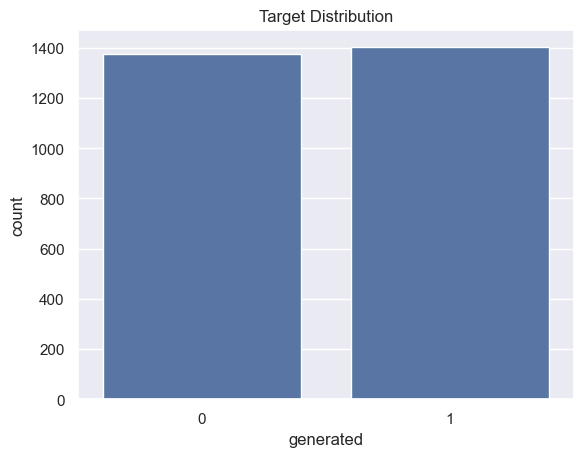

In [6]:
# concatenate the traind dataset with the external LLM dataset
newTrainDf = pd.concat([trainDf, externalLLMDf], ignore_index=True)
print("------Concatenated Dataset------")
print(newTrainDf['generated'].info())
print("\n")
print("------Concatenated Dataset Generated Distribution------")
print(newTrainDf['generated'].value_counts())
sns.countplot(x='generated', data=newTrainDf)
plt.title('Target Distribution')
plt.show()

In [10]:
# verify if there are duplicates
print(f"Before dropping duplicates: {len(newTrainDf)}")
newTrainDf = newTrainDf.drop_duplicates(subset=['text'])
print(f"After dropping duplicates: {len(newTrainDf)}")

Before dropping duplicates: 2778
After dropping duplicates: 2778
